# **Importing Required Libraries**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('float_format', '{:f}'.format)

**Mounting Google Drive**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Datasets

In [56]:
encashment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electoral Bond Data Analysis 2024 01/EncashmentData.csv')
purchase = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electoral Bond Data Analysis 2024 01/PurchaseData.csv')

# **"Encashment" Dataset Description**

In [57]:
encashment.describe(include='all')

,Date of\nEncashment,Name of the Political Party,Denomination
count,20421,20421,20421.000000
unique,230,27,NaN
top,18-Apr-19,BHARTIYA JANTA PARTY,NaN
freq,596,8633,NaN
mean,NaN,NaN,6252920.669899
std,NaN,NaN,4576321.214390
min,NaN,NaN,1000.000000
25%,NaN,NaN,1000000.000000
50%,NaN,NaN,10000000.000000
75%,NaN,NaN,10000000.000000


# **"Purchase" Dataset Description**

In [58]:
purchase.describe(include='all')

,Date of Purchase,Purchaser Name,Denomination
count,18871,18871,18871.000000
unique,146,1316,NaN
top,05-Jan-22,FUTURE GAMING AND HOTEL SERVICES PR,NaN
freq,570,1208,NaN
mean,NaN,NaN,6441372.052355
std,NaN,NaN,4538946.881625
min,NaN,NaN,1000.000000
25%,NaN,NaN,1000000.000000
50%,NaN,NaN,10000000.000000
75%,NaN,NaN,10000000.000000


Encashment Sorting : Top 25 Political Parties

In [59]:
top_25_political_party = encashment.groupby('Name of the Political Party')['Denomination'].sum().sort_values(ascending=False)[:25]

**Encashment Sorting: Top 25 dates**

In [60]:
top_25_dates_encashment = encashment.groupby('Date of\nEncashment')['Denomination'].sum().sort_values(ascending=False)[:25]

**Purchase Sorting : Top 25 Purchasers**

In [61]:
top_25_purchaser = purchase.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False)[:25]

**Purchase Sorting : Top 25 dates**

In [62]:
top_25_purchase_date = purchase.groupby('Date of Purchase')['Denomination'].sum().sort_values(ascending=False)[:25]

**Data Visualization Prerequisites**

In [63]:
top_25_political_party_c = top_10_political_party/10000000
top_25_dates_encashment_c = top_10_dates_encashment/10000000
top_25_purchaser_c = top_10_purchaser/10000000
top_25_purchase_date_c = top_10_purchase_date/10000000

**Data Visualization**
1. Top 25 Political Parties that received money through electoral bonds
2. Top 25 Companies that bought electoral bonds
3. Top 25 Dates of Encashment by Political Parties from SBI
4. Top 25 Dates of Deposition at SBI from Companies

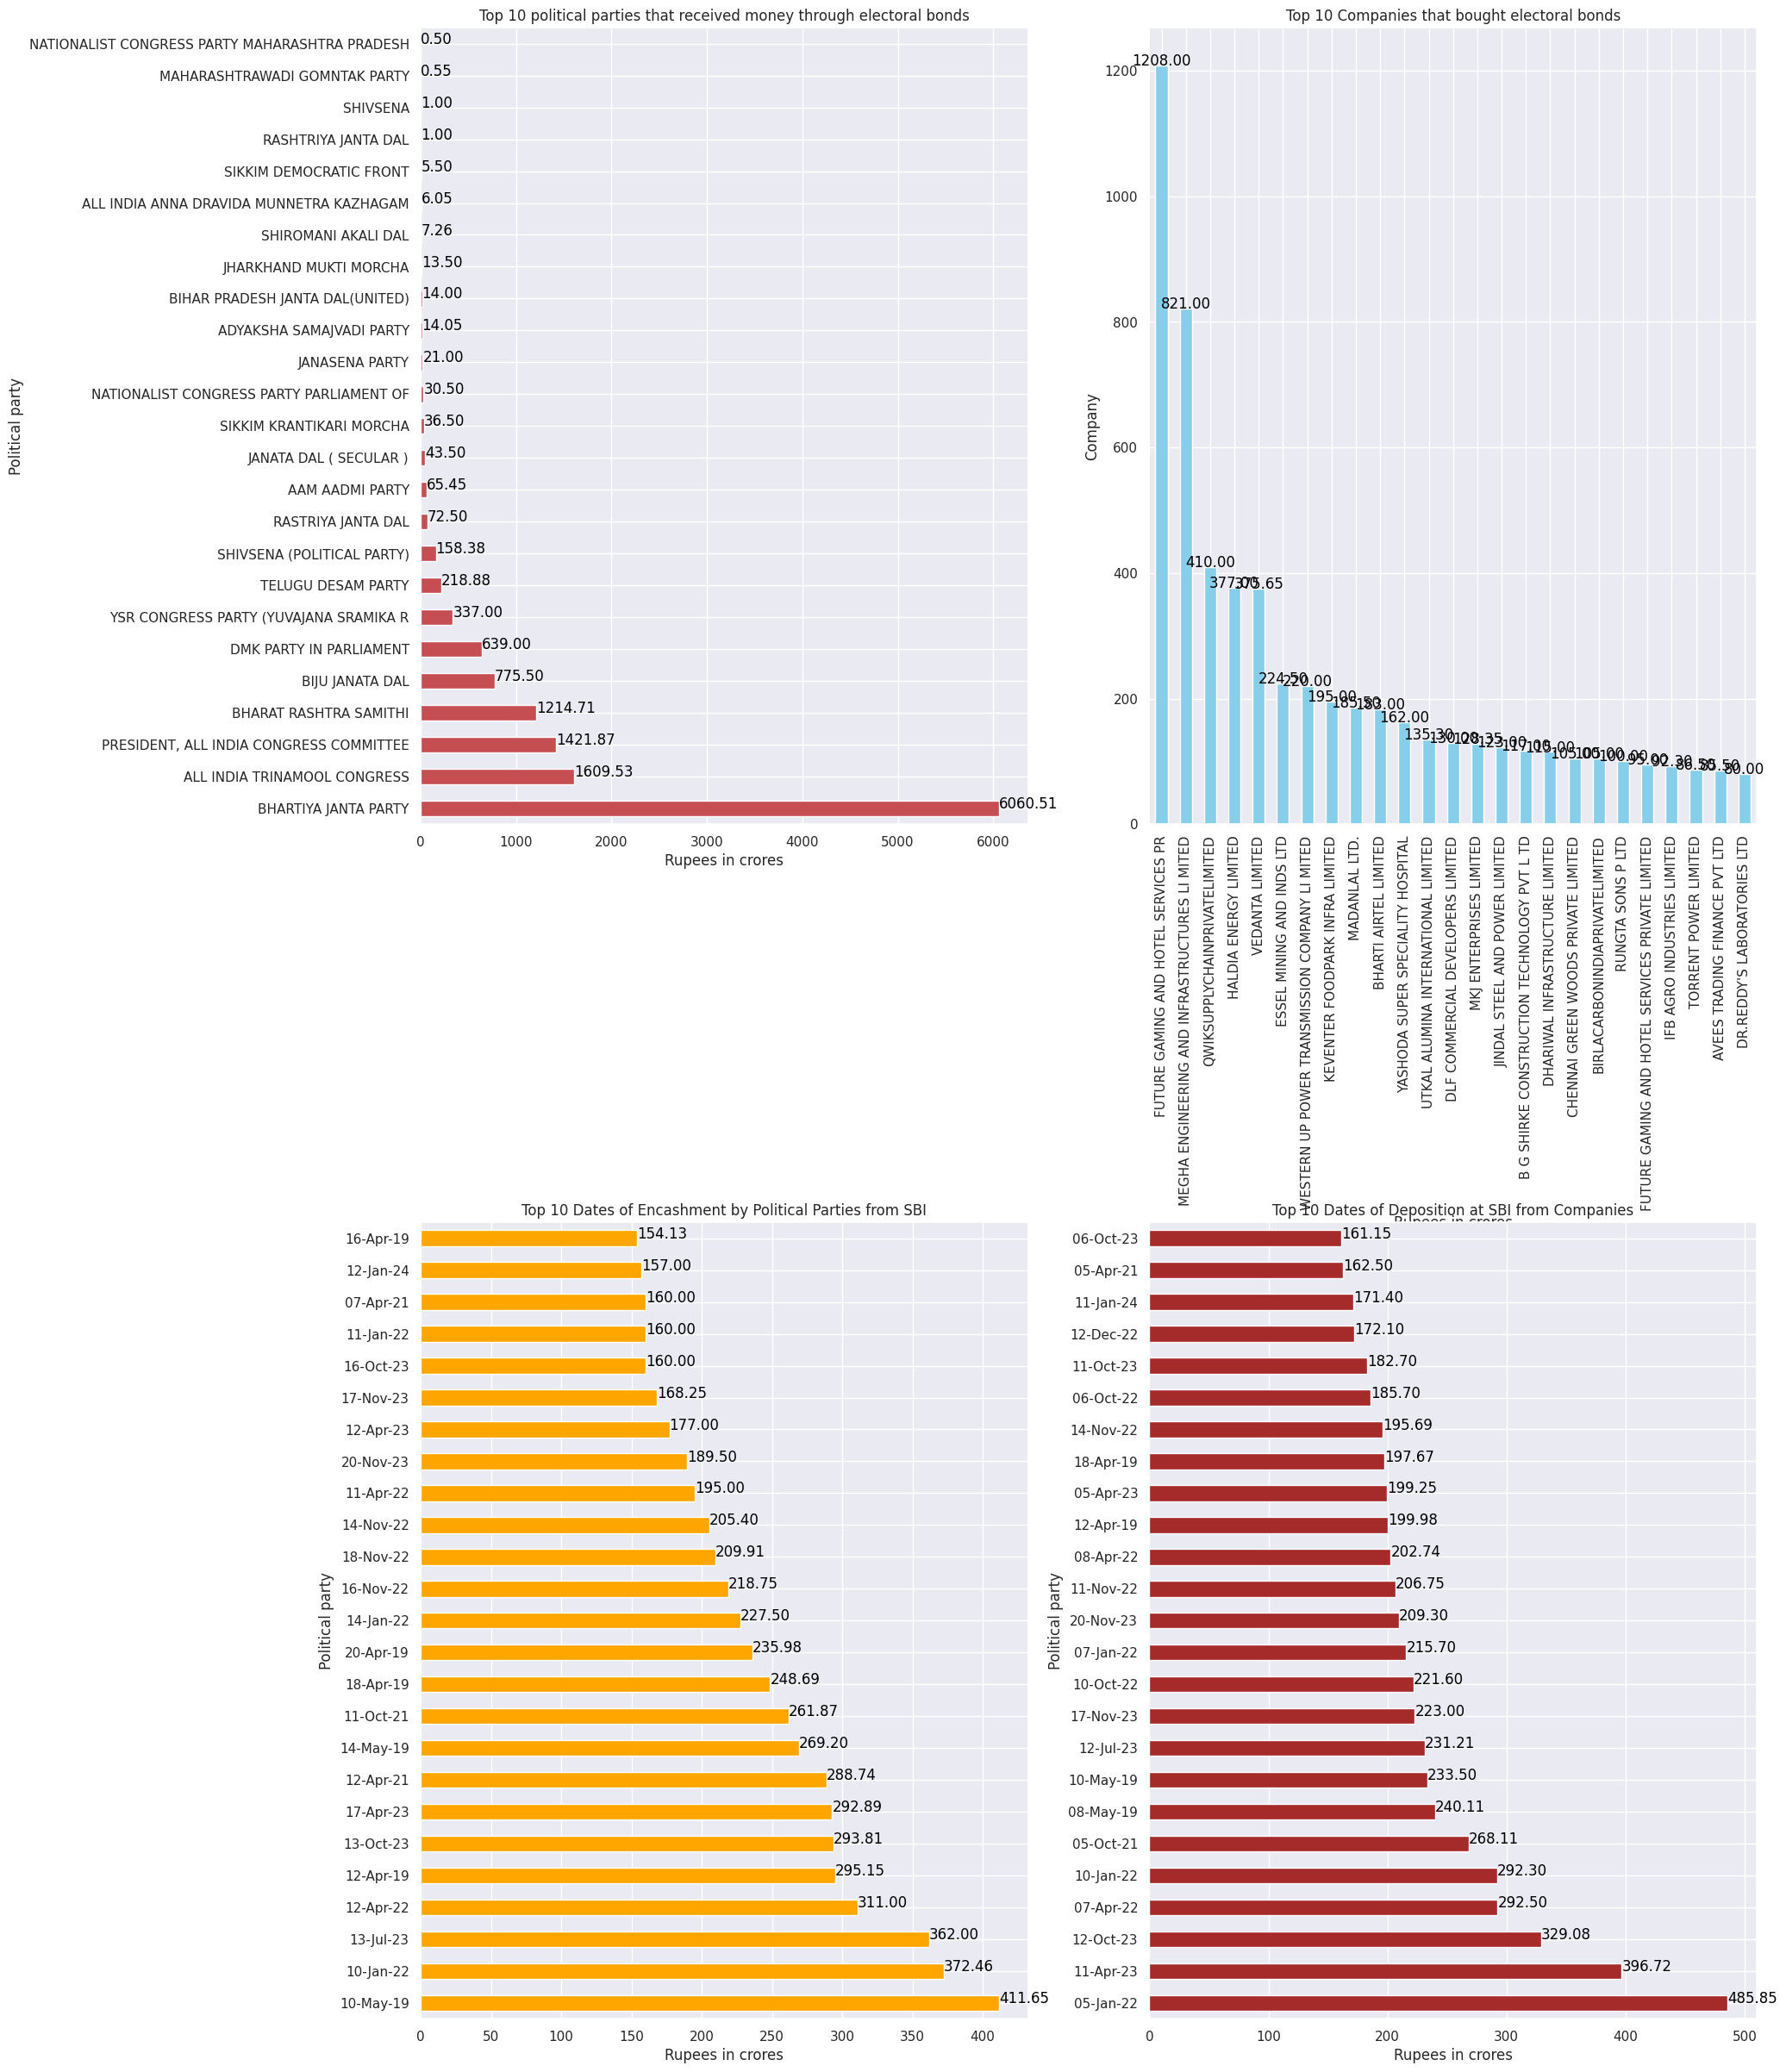

In [64]:
fig, axes = plt.subplots(2,2, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)

top_10_political_party_c.plot(kind='barh', color='r', ax=axes[0,0])
axes[0,0].set_xlabel('Rupees in crores')
axes[0,0].set_ylabel('Political party')
axes[0,0].set_title('Top 10 political parties that received money through electoral bonds')

for index, value in enumerate(top_10_political_party_c):
    axes[0,0].text(value, index, f'{value:.2f}', color='black', ha="left")

top_10_purchaser_c.plot(kind='bar', color='skyblue', ax=axes[0,1])
axes[0,1].set_xlabel('Rupees in crores')
axes[0,1].set_ylabel('Company')
axes[0,1].set_title('Top 10 Companies that bought electoral bonds')

for index, value in enumerate(top_10_purchaser_c):
    axes[0,1].text(index, value, f'{value:.2f}', color='black', ha="center")

top_10_dates_encashment_c.plot(kind='barh', color='orange', ax=axes[1,0])
axes[1,0].set_xlabel('Rupees in crores')
axes[1,0].set_ylabel('Political party')
axes[1,0].set_title('Top 10 Dates of Encashment by Political Parties from SBI')

for index, value in enumerate(top_10_dates_encashment_c):
    axes[1,0].text(value, index, f'{value:.2f}', color='black', ha="left")

top_10_purchase_date_c.plot(kind='barh', color='brown', ax=axes[1,1])
axes[1,1].set_xlabel('Rupees in crores')
axes[1,1].set_ylabel('Political party')
axes[1,1].set_title('Top 10 Dates of Deposition at SBI from Companies')

for index, value in enumerate(top_10_purchase_date_c):
    axes[1,1].text(value, index, f'{value:.2f}', color='black', ha="left")

plt.show()